# KNN Imputation

In [39]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('train.csv')[['Age','Pclass','Fare','Survived']]

In [5]:
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [6]:

df.isnull().sum()

Age         177
Pclass        0
Fare          0
Survived      0
dtype: int64

In [7]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
knn=KNNImputer(n_neighbors=3)

In [11]:
X_train_knn=knn.fit_transform(X_train)

In [12]:
X_test_knn=knn.transform(X_test)

In [15]:
pd.DataFrame(X_train_knn,columns=X_train.columns).isnull().sum()

Age       0
Pclass    0
Fare      0
dtype: int64

In [16]:
lr=LogisticRegression()

In [17]:
lr.fit(X_train_knn,y_train)

LogisticRegression()

In [18]:
lf_pred=lr.predict(X_test_knn)

In [19]:
accuracy_score(y_test,lf_pred)

0.7262569832402235

In [33]:
def predict_survival(n):
    for i in range(1,n):
        knn=KNNImputer(n_neighbors=i)
        X_train_knn=knn.fit_transform(X_train)
        X_test_knn=knn.transform(X_test)
        lr=LogisticRegression()
        lr.fit(X_train_knn,y_train)
        y_pred=lr.predict(X_test_knn)
        accuracy=accuracy_score(y_test,y_pred)
        print('For {} neighbors accuracy is {}'.format(i,accuracy*100))



In [35]:
n=int(input('Enter the number of neighbors:'))
predict_survival(n)

For 1 neighbors accuracy is 73.74301675977654
For 2 neighbors accuracy is 72.06703910614524
For 3 neighbors accuracy is 72.62569832402235
For 4 neighbors accuracy is 72.06703910614524
For 5 neighbors accuracy is 72.06703910614524
For 6 neighbors accuracy is 73.18435754189943
For 7 neighbors accuracy is 72.62569832402235
For 8 neighbors accuracy is 73.18435754189943
For 9 neighbors accuracy is 73.18435754189943
For 10 neighbors accuracy is 72.62569832402235
For 11 neighbors accuracy is 72.62569832402235
For 12 neighbors accuracy is 72.62569832402235
For 13 neighbors accuracy is 73.18435754189943
For 14 neighbors accuracy is 73.18435754189943
For 15 neighbors accuracy is 73.18435754189943
For 16 neighbors accuracy is 73.18435754189943
For 17 neighbors accuracy is 73.18435754189943
For 18 neighbors accuracy is 73.18435754189943
For 19 neighbors accuracy is 73.18435754189943
For 20 neighbors accuracy is 73.18435754189943
For 21 neighbors accuracy is 72.62569832402235


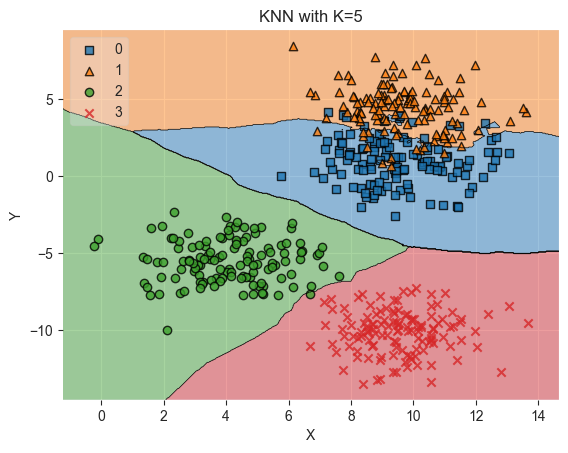

In [40]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split

# Step 1: Generate a synthetic dataset with 2 features and 4 centers (clusters)
X, y = datasets.make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.5, random_state=4)

# Step 2: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the KNN classifier with 5 neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# Step 4: Train the KNN model using the training data
knn.fit(X_train, y_train)

# Step 5: Visualize the decision regions of the trained KNN model
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=knn, legend=2)

# Step 6: Label the axes and add a title to the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KNN with K=5')

# Step 7: Save the plot as an image file with tight bounding box and high resolution (150 dpi)
plt.savefig('KNN with K=5.jpeg', bbox_inches="tight", dpi=150)

# Step 8: Display the plot
plt.show()